In [5]:
# Imports - exercise 9
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
import time
import cv2
from scipy.ndimage import correlate
from skimage.filters import median
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from skimage.filters import gaussian
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
from skimage import color
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
from skimage.filters import prewitt
from skimage.filters import threshold_otsu
from skimage.filters import median
from skimage.filters import gaussian
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb

import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage.transform import matrix_transform


from skimage import io
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import glob
from sklearn.decomposition import PCA
from skimage.transform import SimilarityTransform
from skimage.transform import warp
import os
import pathlib

from auxiliaryFuns import *

import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from IPython.display import clear_output

In [6]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

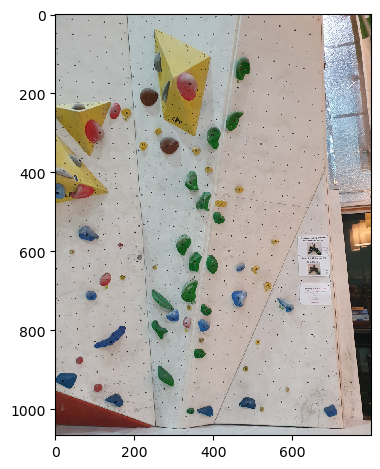

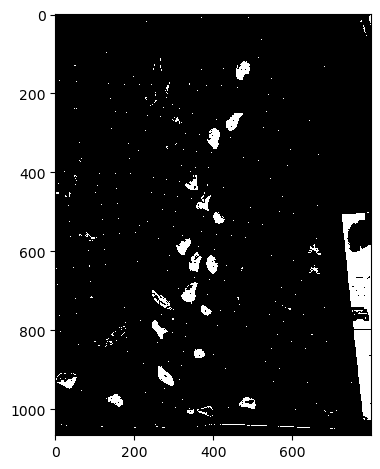

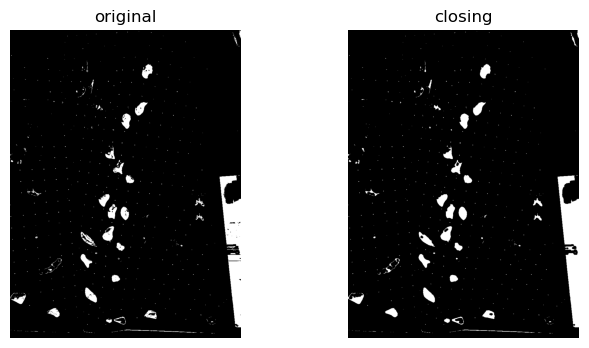

In [17]:
# Question 1

# Read in an image
in_dir = "./data/"
input_img = io.imread(in_dir + "ClimbingWall.png")

# Show image
io.imshow(input_img)
io.show()

# Apply RGB threshold
red_threshold = 60
green_threshold = 200
blue_threshold = 100

threshold_mask = (input_img[:, :, 0] < red_threshold) & (input_img[:, :, 1] < green_threshold) & (input_img[:, :, 2] < blue_threshold)

# Create a binary threshold image
binary_thresholded_image = np.zeros_like(threshold_mask)
binary_thresholded_image[threshold_mask] = 1

io.imshow(binary_thresholded_image, cmap="gray")
io.show()

# closes holes in objects
footprint = disk(3)
closed = closing(binary_thresholded_image, footprint)
plot_comparison(binary_thresholded_image, closed, 'closing')



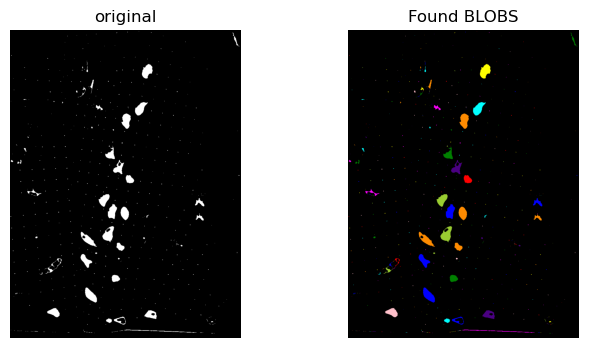

Number of blobs: 566


In [25]:
segmented = segmentation.clear_border(closed)

label_img = measure.label(segmented)
image_label_overlay = label2rgb(label_img)
plot_comparison(segmented, image_label_overlay, 'Found BLOBS')

region_props = measure.regionprops(label_img)

num_blobs = len(region_props)

print("Number of blobs:", num_blobs)